In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel("cng_car.xlsx")

In [ ]:
df.head()

,Reviews
0,Air filter 's quality degradation is not cause...
1,I took k10 10 years back and fitted ang kit cl...
2,CNG's efficient mileage contributes to a reduc...
3,Air filter should cleaned frequently and not c...
4,Final conclusion I am telling : the running co...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_df=0.9,min_df=1,stop_words='english')

In [ ]:
dtm=cv.fit_transform(df['Reviews'])

In [ ]:
dtm

<155x725 sparse matrix of type '<class 'numpy.int64'>'
	with 1537 stored elements in Compressed Sparse Row format>

In [ ]:
import nltk
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Tokenization and preprocessing
texts = []
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for raw_text in df['Reviews']:
    # Tokenize the raw text into words
    tokens = word_tokenize(raw_text)

    # Remove punctuation and convert to lowercase
    tokens = [token.lower() for token in tokens if token not in string.punctuation]

    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Add preprocessed tokens to texts
    texts.append(tokens)

# Print the tokenized documents
for i, doc in enumerate(texts):
    print(f"Document {i + 1}: {doc}")

Document 1: ['air', 'filter', "'s", 'quality', 'degradation', 'caused', 'cng', '6:15', 'coolant', 'degrade', 'due', 'cng', '6:12', 'long', 'gasket', 'radiator', 'hose', 'fine']
Document 2: ['took', 'k10', '10', 'year', 'back', 'fitted', 'ang', 'kit', 'closed', 'loop', 'used', '140000kms', 'frequent', 'care', 'needed', 'overall', 'nice', 'performance']
Document 3: ['cng', "'s", 'efficient', 'mileage', 'contributes', 'reduced', 'carbon', 'footprint']
Document 4: ['air', 'filter', 'cleaned', 'frequently', 'changed', 'frequently', 'ignition', 'system', 'perfect', 'condition', 'run', 'cng']
Document 5: ['final', 'conclusion', 'telling', 'running', 'cost', 'decrease', 'maintained', 'cost', 'increase', 'several', 'fold', 'car', 'coolant/engine', 'oil', 'spare', 'part', 'come', 'cheap', '....', 'overall', 'cost', 'increase', 'many', 'time', '..']
Document 6: ['finally', "'s", 'stupid', 'idea', 'install', 'cng', 'consider', 'environment', "'s", 'fine', '....']
Document 7: ["n't", 'even', 'car',

In [ ]:
# Use coherence scores to find the optimal number of topics

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# 3. Select a Range of Topic Numbers
start_topics = 2
limit_topics = 6
step_topics = 1
topic_range = range(start_topics, limit_topics + 1, step_topics)

# 4. Train LDA Models and 5. Compute Coherence Scores
coherence_scores = []
for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes=10, iterations=50)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
# 6. Select the Optimal Number of Topics
optimal_num_topics = topic_range[coherence_scores.index(max(coherence_scores))]
print("Optimal number of topics:", optimal_num_topics)

Optimal number of topics: 5


In [ ]:
coherence_scores

[0.37836470030365044,
 0.3616353191466793,
 0.4016815032902064,
 0.4086849815641522,
 0.35897543526412107]

In [ ]:
LDA=LatentDirichletAllocation(n_components=5, random_state=40)

In [ ]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=40)

In [ ]:
len(cv.get_feature_names_out())

725

In [ ]:
# Grap the Topics

In [ ]:
len(LDA.components_)

5

In [ ]:
LDA.components_.shape

(5, 725)

In [ ]:
LDA.components_  # these are 5 topics with 725 words for each topic

array([[0.20000301, 1.19996667, 0.20000196, ..., 0.20000147, 5.19984449,
        1.19997689],
       [1.20056298, 0.20000777, 0.20000413, ..., 0.20000353, 1.20012826,
        0.20000559],
       [0.2000078 , 0.20000889, 1.19998521, ..., 0.20000389, 0.2000094 ,
        0.20000604],
       [0.20001077, 0.20001202, 0.20000629, ..., 0.20000542, 0.20001291,
        0.20000829],
       [1.19941544, 0.20000464, 0.20000241, ..., 1.19998569, 0.20000494,
        0.20000319]])

In [ ]:
single_topic=LDA.components_[0]

In [ ]:
single_topic.argsort()  # arrange the words in ascendind to descending  based on the index position

array([439, 588, 668, 658, 636, 635,  12, 537, 269, 670, 469, 473, 276,
       525, 397, 436, 195, 603, 266, 699, 189,  11, 446, 442, 149, 587,
       647, 452, 678, 654, 651, 402, 259, 575, 579,  53,  22, 637, 520,
       150, 626,  84, 582, 335,  58,  57, 203, 130,  34, 638, 197,  78,
       566, 471, 644, 657, 190, 293, 142, 650, 333, 386, 614,  18, 585,
       481, 394, 464, 445, 298, 403, 375, 659, 121,  43, 450,   5, 253,
       510, 284, 615, 598, 401, 554,  48, 387, 101,  21, 104, 260, 523,
        17,  16, 164, 563, 377,  23, 536,  44, 128, 713, 641,  83, 552,
       461, 669, 351, 170,  68, 163, 721, 262, 453, 393,  94, 457, 467,
       194, 448, 217, 263, 522,  91, 673, 289, 664, 218, 372, 369, 252,
       607, 226, 681,  92, 492,  19, 322, 491, 353, 529,  27, 168, 484,
       115,  64, 499, 722, 426, 320, 422, 182,  65, 294, 156,  20, 159,
        74, 706, 468,  60, 642, 174, 250,  75, 419, 530, 346, 606,  97,
       258, 254, 245, 548, 631, 239, 540, 310, 246, 290,  40, 13

In [ ]:
top_ten_words=single_topic.argsort()[-10:]   # index position of top 10 highest word

In [ ]:
for index in top_ten_words:
  print(cv.get_feature_names_out()[index])

switch
power
fuel
vehicle
compared
mileage
price
car
petrol
cng


In [ ]:
# grab the highest probability word per topic

In [ ]:
for i, topic in enumerate(LDA.components_):
    print(f"The top 10 words for Topic #{i}")
    print([cv.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print('\n')

The top 10 words for Topic #0
['switch', 'power', 'fuel', 'vehicle', 'compared', 'mileage', 'price', 'car', 'petrol', 'cng']


The top 10 words for Topic #1
['tyre', 'lower', 'efficiency', 'transmission', 'car', 'fuel', 'vehicles', 'switch', 'cost', 'cng']


The top 10 words for Topic #2
['variant', 'impact', 'sit', 'running', 'people', 'point', 'petrol', 'car', 'price', 'cng']


The top 10 words for Topic #3
['carbon', 'nasik', 'environmental', 'vehicles', 'high', 'benefits', 'pune', 'switch', 'mileage', 'cng']


The top 10 words for Topic #4
['vehicles', 'use', 'better', 'comfortable', 'boot', 'petrol', 'space', 'car', 'cars', 'cng']




In [ ]:
topic_results=LDA.transform(dtm)

In [ ]:
topic_results.shape  # total documents vs topic

(155, 5)

In [ ]:
topic_results[0]

array([0.95520815, 0.01118576, 0.01113095, 0.0112078 , 0.01126735])

In [ ]:
topic_results[0].argmax()

0

In [ ]:
df['Topic']=topic_results.argmax(axis=1)

In [ ]:
df

,Reviews,Topic
0,Air filter 's quality degradation is not cause...,0
1,I took k10 10 years back and fitted ang kit cl...,1
2,CNG's efficient mileage contributes to a reduc...,3
3,Air filter should cleaned frequently and not c...,0
4,Final conclusion I am telling : the running co...,1
...,...,...
150,Entry-level CNG cars are generally price lower...,2
151,Maintenance costs for CNG vehicles are often l...,1
152,Don't switch to CNG due to concerns about the ...,1
153,CNG cars often have lower maintenance requirem...,1


In [ ]:
df['Topic'].value_counts()

0    59
4    52
1    22
2    14
3     8
Name: Topic, dtype: int64

In [ ]:
df_3=df[df['Topic'] == 3]

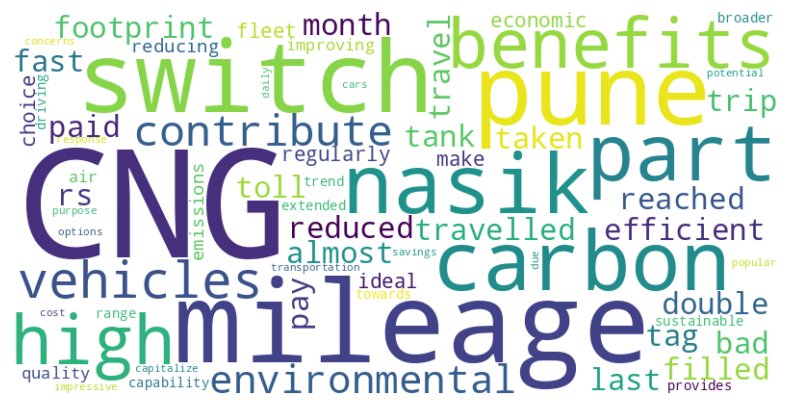

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the reviews into a single string
all_reviews_text = ' '.join(df_3['Reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
df_0=df[df['Topic'] == 0]

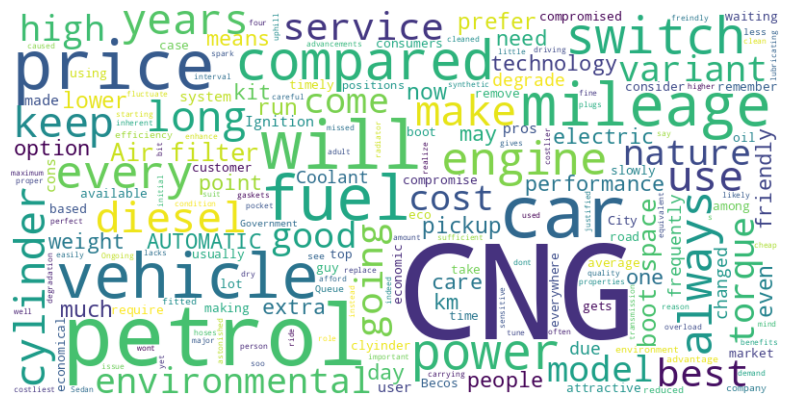

In [ ]:
# Concatenate all the reviews into a single string
all_reviews_text = ' '.join(df_0['Reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
df_1=df[df['Topic'] == 1]

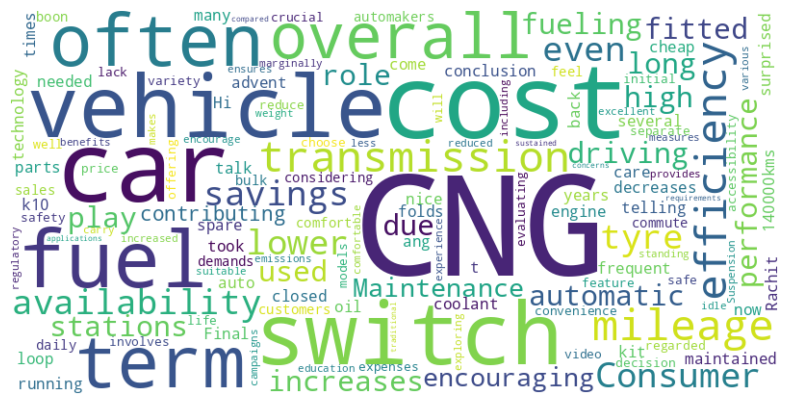

In [ ]:
# Concatenate all the reviews into a single string
all_reviews_text = ' '.join(df_1['Reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [ ]:
df[df['Topic'] == 3]

,Reviews,Topic
2,CNG's efficient mileage contributes to a reduc...,3
13,"last month I travelled from pune to nasik , I ...",3
72,The high mileage and economic benefits make CN...,3
127,switch to CNG vehicles contribute to reducing ...,3
129,The high mileage capability of CNG vehicles pr...,3
134,The switch to CNG is part of a broader trend t...,3
140,the switch to CNG to capitalize on the potenti...,3
142,CNG cars are popular for daily purpose due to ...,3
